In [1]:
from datasets import load_dataset
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import emoji

In [2]:
dataset = load_dataset("ura-hcmut/vlsp2016")
emoticon_sentiment = load_dataset(
    'csv',
    data_files='https://huggingface.co/datasets/viethq1906/emotion-symbols-sentiment/resolve/main/emoticon_sentiment.csv'
)['train'].to_pandas()

emoji_sentiment = load_dataset(
    'csv',
    data_files='https://huggingface.co/datasets/viethq1906/emotion-symbols-sentiment/resolve/main/esr.csv'
)['train'].to_pandas()

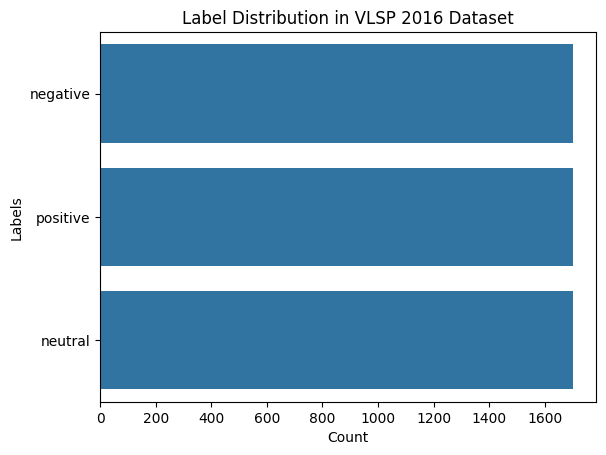

In [3]:
sns.countplot(y=dataset['train']['Class'])
plt.title('Label Distribution in VLSP 2016 Dataset')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

In [4]:
print(emoticon_sentiment[emoticon_sentiment['emoticon'] == '=))'])

    emoticon  sentiment_score
238      =))              1.3


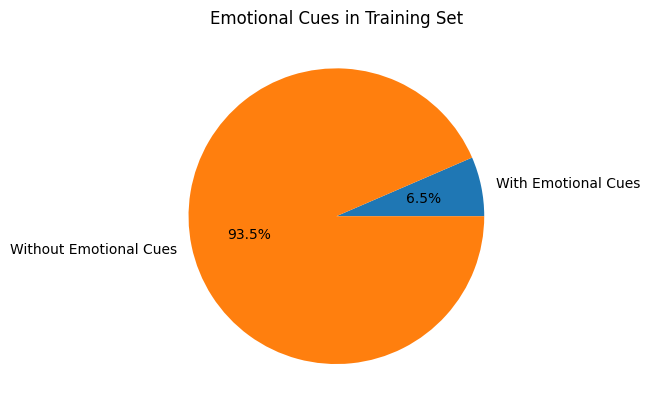

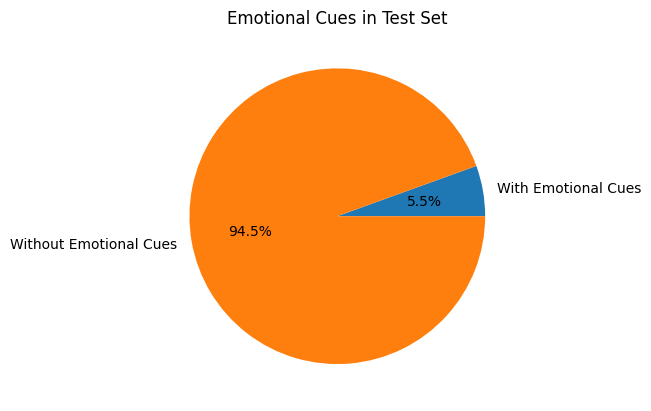

Training Set: 331 out of 5100 samples have emotional cues.
Test Set: 58 out of 1050 samples have emotional cues.


In [5]:
def has_emotional_cues(text):
    for emoticon in emoticon_sentiment['emoticon']:
        if emoticon in text:
            return 1
    for emj in emoji_sentiment['Emoji']:
        if emj in text:
            return 1
    return 0

train_count = 0
for row in dataset['train']:
    text = row['Data']
    train_count += has_emotional_cues(text)
    
test_count = 0
for row in dataset['test']:
    text = row['Data']
    test_count += has_emotional_cues(text)

plt.pie(
    [train_count, len(dataset['train']) - train_count],
    labels=['With Emotional Cues', 'Without Emotional Cues'],
    autopct='%1.1f%%'
)
plt.title('Emotional Cues in Training Set')
plt.show()

plt.pie(
    [test_count, len(dataset['test']) - test_count],
    labels=['With Emotional Cues', 'Without Emotional Cues'],
    autopct='%1.1f%%'
)
plt.title('Emotional Cues in Test Set')
plt.show()

print(f"Training Set: {train_count} out of {len(dataset['train'])} samples have emotional cues.")
print(f"Test Set: {test_count} out of {len(dataset['test'])} samples have emotional cues.")

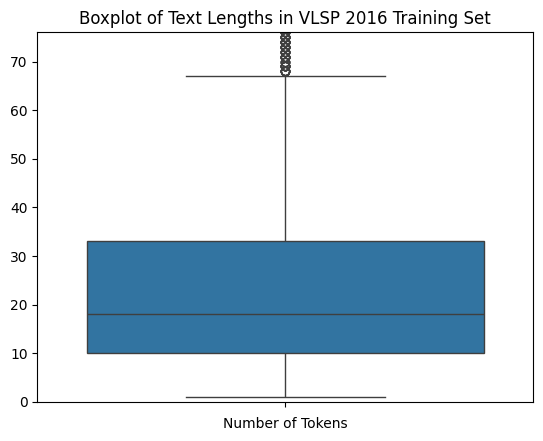

In [8]:
from underthesea import word_tokenize
import numpy as np
len_arr = [len(word_tokenize(row['Data'])) for row in dataset['train']]

sns.boxplot(len_arr)
plt.ylim(0, np.percentile(len_arr, 95))
plt.title('Boxplot of Text Lengths in VLSP 2016 Training Set')
plt.xlabel('Number of Tokens')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_df = pd.DataFrame(dataset['train'])
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)
test_df = pd.DataFrame(dataset['test'])

num_null = test_df['Data'].isnull().sum()
print(f"Number of null entries in training set: {num_null}")

train_df['Class'] = train_df['Class'].map({'positive': 1, 'negative': -1, 'neutral': 0})
val_df['Class'] = val_df['Class'].map({'positive': 1, 'negative': -1, 'neutral': 0})
test_df['Class'] = test_df['Class'].map({'positive': 1, 'negative': -1, 'neutral': 0})
train_df.head()

Number of null entries in training set: 0


,Class,Data
2634,1,"màu sắc đẹp và tự nhiên quá, chúc mừng HTC^^"
2706,1,"Kết tấm này quá, ánh sáng tím ở mấy hàng cây m..."
3807,0,nếu có chip GPS nữa thì ngon
3690,0,"Sao có người nói được, có người ko là sao Mình..."
1808,1,Mình tắm hay rửa tay thì vẫn k tháo ra. Xài đư...


In [ ]:
import json
import os

# Function to convert DataFrame to the required JSON format
def save_to_json(df, filepath):
    records = []
    for _, row in df.iterrows():
        record = {
            "sentence": row['Data'],
            "sentiment": int(row['Class'])  # Convert to int to ensure proper format
        }
        records.append(record)
    
    with open(filepath, 'w', encoding='utf-8') as f:
        json.dump(records, f, ensure_ascii=False, indent=4)
    
    print(f"Saved {len(records)} records to {filepath}")

save_to_json(train_df, 'train.json')
save_to_json(val_df, 'val.json')
save_to_json(test_df, 'test.json')

Saved 4590 records to train.json
Saved 510 records to val.json
Saved 1050 records to test.json
